In [1]:
import load_data
import process_data
import prediction
import visualizations
import matplotlib.pyplot as plt

In [2]:
# Load and split data

X, y = load_data.load_data('austin_shelter_cats')
X = process_data.standardize_matrix(X)

X_train, X_test, y_train, y_test = load_data.split_data(X, y)

#X_train, y_train = preprocess.over_sample_data(X_train_undersampled, y_train_undersampled)

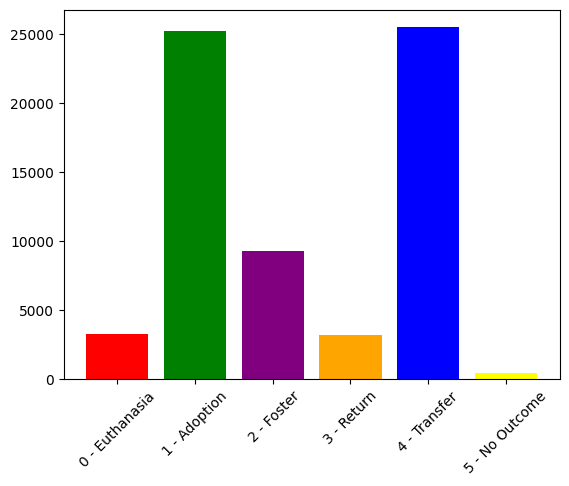

In [3]:
# Graph label class frequency

plot = visualizations.make_label_distribution_graph(y)
plot.show
plot.savefig('images/label_distribution.png')


In [4]:
# Test different values of learning rate

learning_rates = [10, 5, 1, .05, .01, .005, .001, .0005, .0001]
learning_rate_scores = []

for learning_rate in learning_rates:
    mlr = prediction.Multinomial_Logistic_Regression(learning_rate=learning_rate)
    loss_array = mlr.fit(X_train, y_train.T)
    _, accuracy, precision, recall, f1 = mlr.predict(X_test, y_test)
    learning_rate_scores.append((accuracy, precision, recall, f1))
    

Weights and bias are updated


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weights and bias are updated


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weights and bias are updated


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weights and bias are updated


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weights and bias are updated


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weights and bias are updated
Weights and bias are updated
Weights and bias are updated
Weights and bias are updated


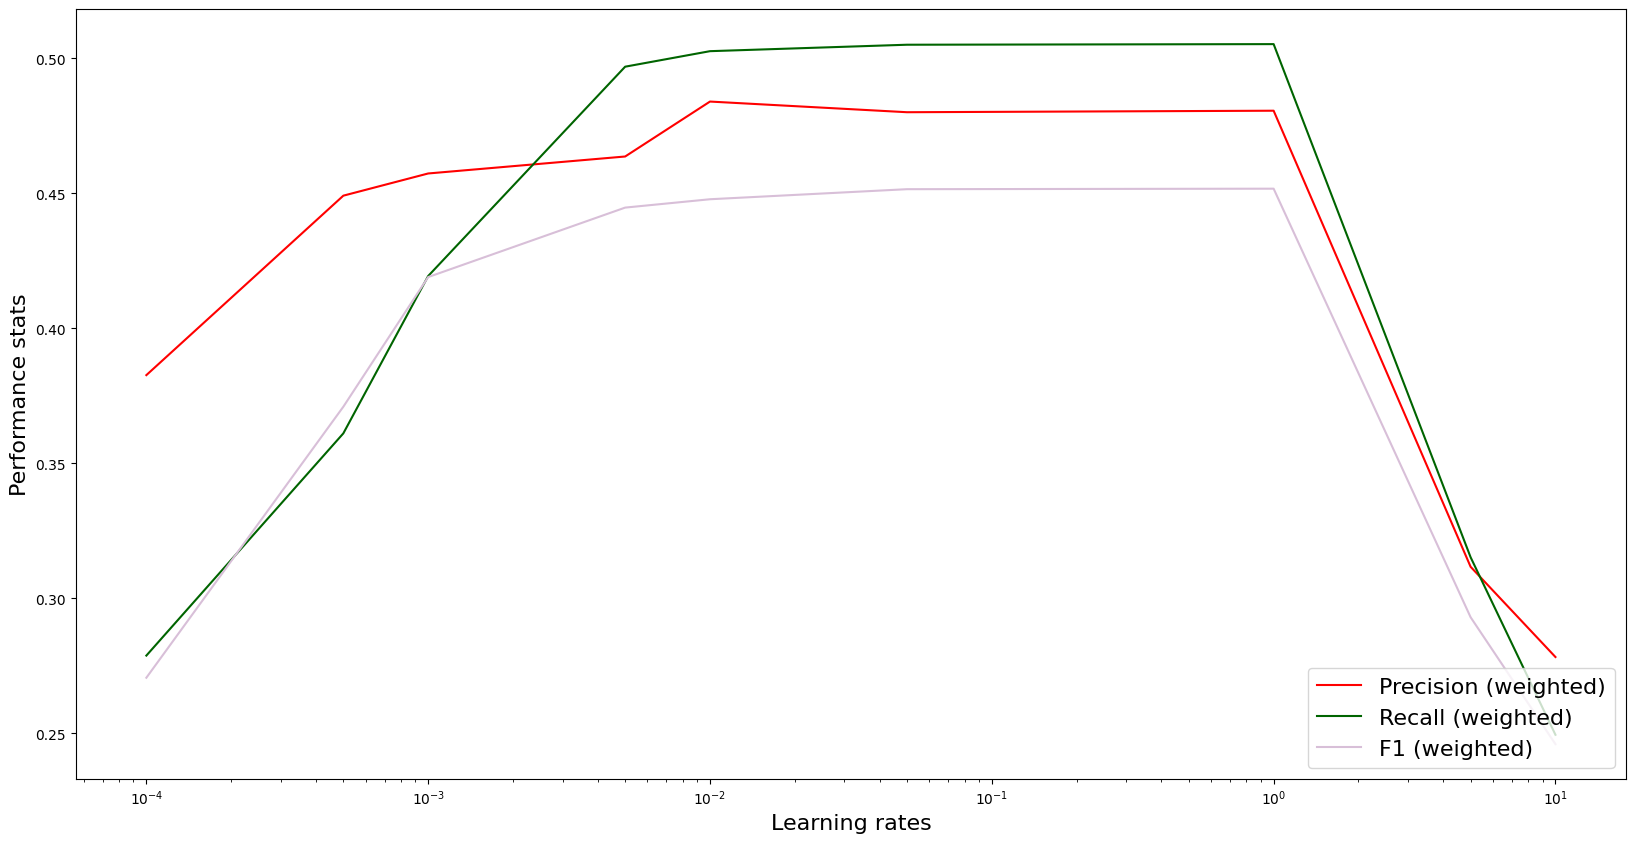

In [17]:
# Graph model performance for different learning rates

plot = visualizations.make_hyperparameter_graph(learning_rates, learning_rate_scores, "Learning rates")
plot.show
plot.savefig('images/learning_rates.png')

In [15]:
# Test different values of number of epochs

epoch_lengths = [100, 500, 1000, 1500, 2000, 3000, 5000, 10000]
epoch_scores = []

for epoch_length in epoch_lengths:
    mlr = prediction.Multinomial_Logistic_Regression(max_epoch=epoch_length)
    loss_array = mlr.fit(X_train, y_train.T)
    _, accuracy, precision, recall, f1 = mlr.predict(X_test, y_test)
    epoch_scores.append((accuracy, precision, recall, f1))


Weights and bias are updated
Weights and bias are updated
Weights and bias are updated
Weights and bias are updated
Weights and bias are updated
Weights and bias are updated
Weights and bias are updated


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weights and bias are updated


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


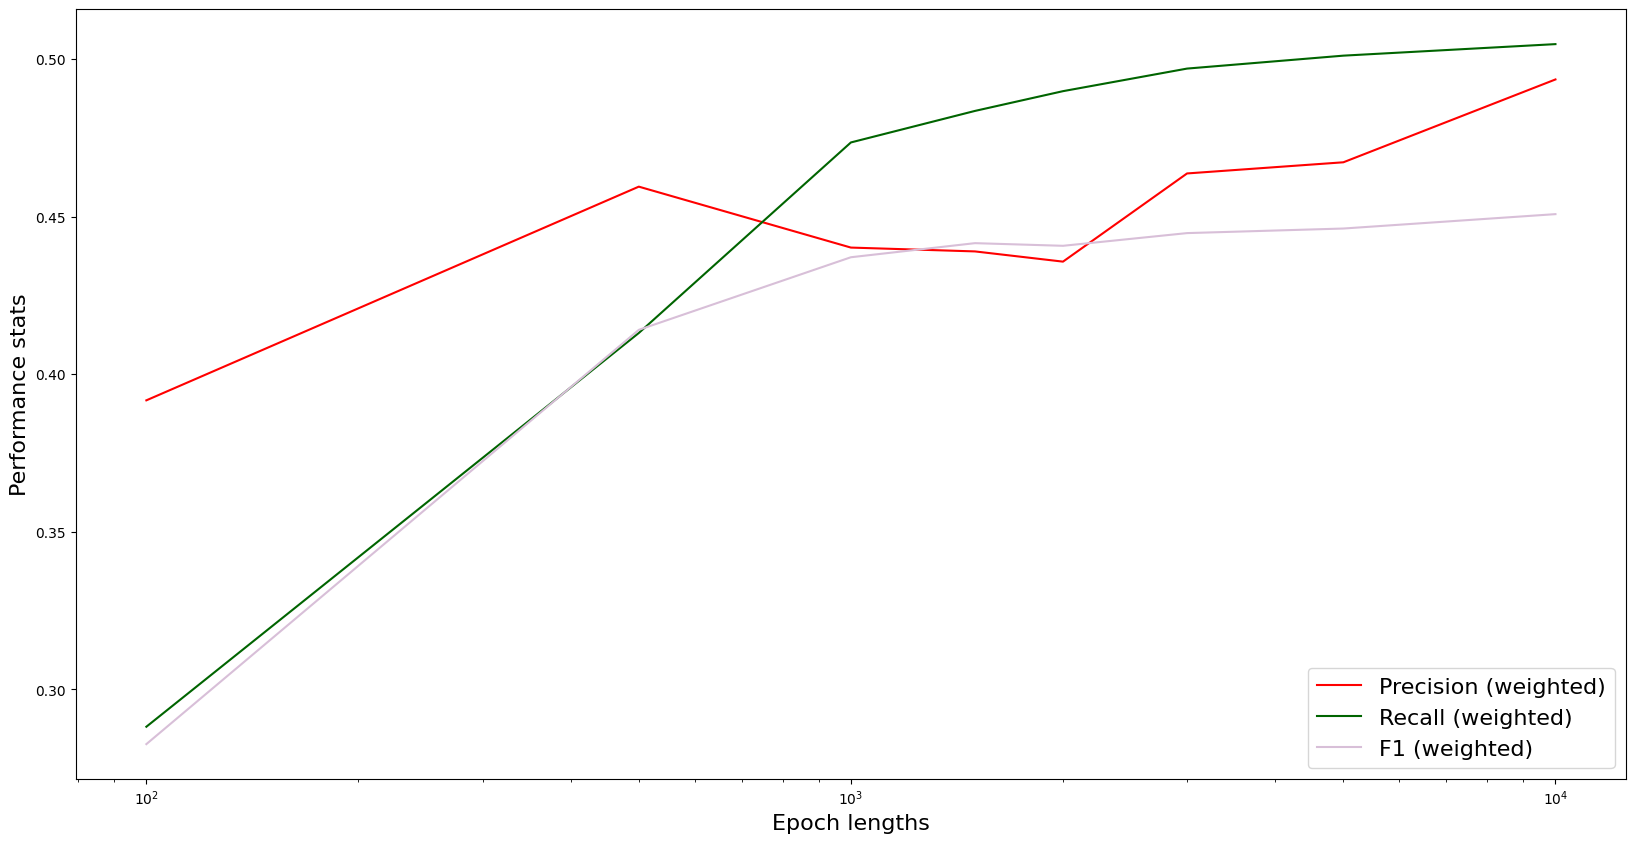

In [16]:
# Graph model performance for different numbers of epochs

plot = visualizations.make_hyperparameter_graph(epoch_lengths, epoch_scores, "Epoch lengths")
plot.show
plot.savefig('images/epoch_lengths.png')

In [18]:
# Create best model based on hyperparameter testing
mlr = prediction.Multinomial_Logistic_Regression(verbose=False, learning_rate=1, max_epoch=10000, epsilon=1e-1000)
loss_array = mlr.fit(X_train, y_train.T)

Weights and bias are updated


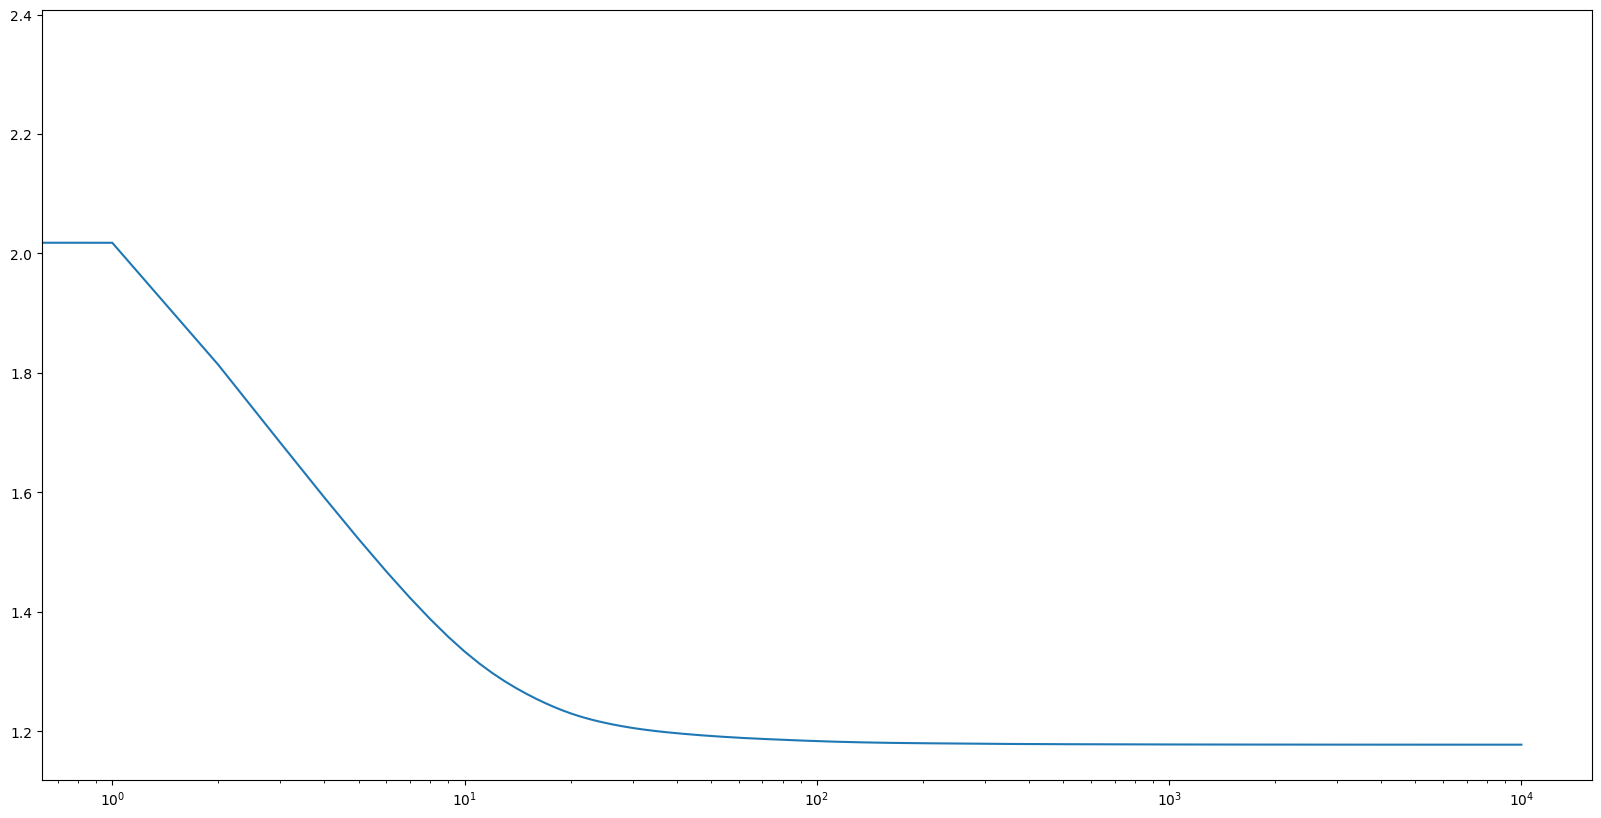

In [19]:
# Plot loss over epochs
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.set_xscale("log")
plt.plot(loss_array)
plt.savefig('images/loss_over_epochs.png')

0.5038719187923345 0.4885272728307448 0.5038719187923345 0.45075568544905914


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


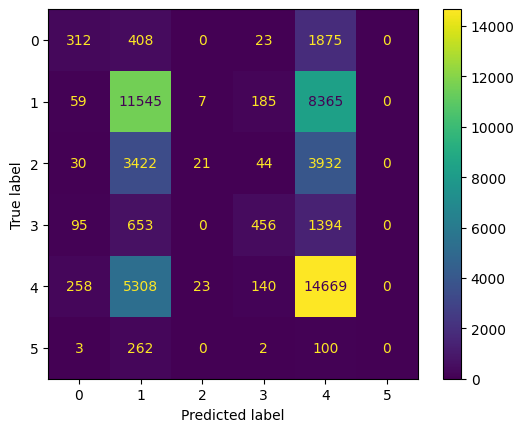

In [20]:
# Print relevant metrics and make confusion matrix on train data
y_hat_train, accuracy, precision, recall, f1 = mlr.predict(X_train, y_train)
print(accuracy, precision, recall, f1)
visualizations.make_confusion_matrix(y_train, y_hat_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5052246603970741 0.4805768912285223 0.5052246603970741 0.4516608237542698


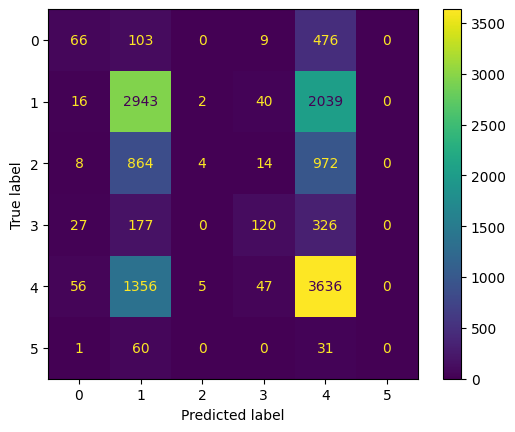

In [24]:
# Print relevant metrics and make confusion matrix on test data
y_hat_test, accuracy, precision, recall, f1 = mlr.predict(X_test, y_test)
print(accuracy, precision, recall, f1)
visualizations.make_confusion_matrix(y_test, y_hat_test)
plt.savefig('images/final_model_confusion_matrix.png')